Step 0: y=48.10, vy=-0.94 → predicted x at y=0: 22.78
Step 1: y=46.40, vy=-1.32 → predicted x at y=0: 64.68
Step 2: y=43.99, vy=-1.76 → predicted x at y=0: 60.06
Step 3: y=41.52, vy=-2.00 → predicted x at y=0: 57.17
Step 4: y=39.08, vy=-2.12 → predicted x at y=0: 60.13
Step 5: y=37.58, vy=-1.97 → predicted x at y=0: 54.87
Step 6: y=35.68, vy=-1.95 → predicted x at y=0: 53.48
Step 7: y=33.64, vy=-1.97 → predicted x at y=0: 50.87
Step 8: y=31.96, vy=-1.91 → predicted x at y=0: 47.03
Step 9: y=30.02, vy=-1.92 → predicted x at y=0: 47.45
Step 10: y=28.37, vy=-1.86 → predicted x at y=0: 47.78
Step 11: y=25.96, vy=-1.98 → predicted x at y=0: 50.29
Step 12: y=24.35, vy=-1.90 → predicted x at y=0: 49.12
Step 13: y=22.91, vy=-1.80 → predicted x at y=0: 47.03
Step 14: y=21.33, vy=-1.75 → predicted x at y=0: 45.90
Step 15: y=18.58, vy=-1.97 → predicted x at y=0: 49.91
Step 16: y=16.54, vy=-1.98 → predicted x at y=0: 52.86
Step 17: y=14.07, vy=-2.09 → predicted x at y=0: 54.25
Step 18: y=12.04, vy

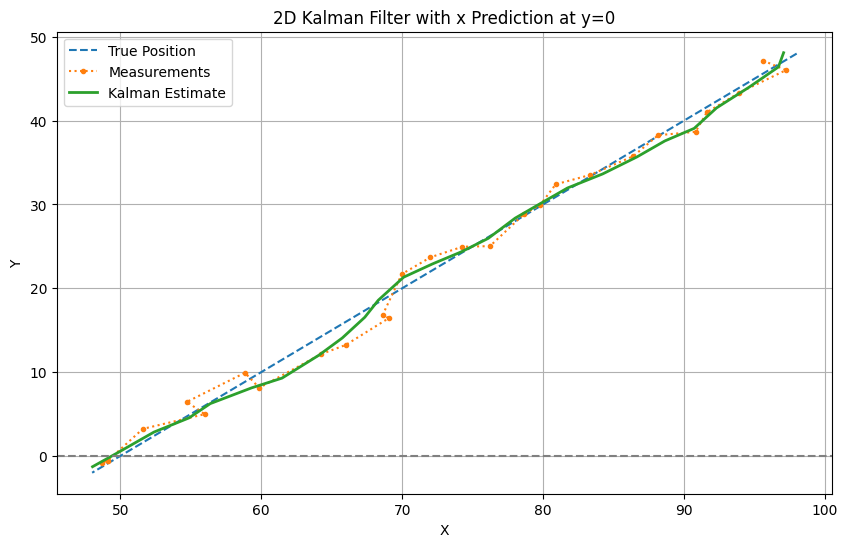

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time step
dt = 1.0
n = 50  # number of steps

# State transition matrix (A)
A = np.array([[1, 0, dt, 0],
              [0, 1, 0, dt],
              [0, 0, 1,  0],
              [0, 0, 0,  1]])

# Measurement matrix (H): we only observe position
H = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])

# Process and measurement noise
Q = 0.01 * np.eye(4)
R = np.array([[1.0, 0],
              [0, 1.0]])

# Initial position and direction
start_x = 100  # use 100 to simulate falling from the right
direction = 1 if start_x == 0 else -1

# True initial state: starts at (start_x, 50) moving diagonally
true_state = np.array([[start_x],
                       [50],
                       [2.0 * direction],
                       [-2.0]])

# Initial Kalman state estimate and uncertainty
x_est = np.array([[start_x],
                  [50],
                  [0],
                  [0]])
P = np.eye(4)

# For plotting and predictions
true_pos, measurements, estimates, predictions = [], [], [], []

for step in range(n):
    # --- Simulate motion and noisy measurement ---
    true_state = A @ true_state
    true_pos.append(true_state[:2].flatten())

    z = H @ true_state + np.random.multivariate_normal([0, 0], R).reshape(2, 1)
    measurements.append(z.flatten())

    # --- Kalman Filter ---
    # Predict
    x_pred = A @ x_est
    P_pred = A @ P @ A.T + Q

    # Update
    y = z - (H @ x_pred)
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    x_est = x_pred + K @ y
    P = (np.eye(4) - K @ H) @ P_pred

    estimates.append(x_est[:2].flatten())

    # --- Predict x when y = 0 ---
    x_now, y_now, vx, vy = x_est.flatten()
    if vy != 0:
        t_to_zero = -y_now / vy
        if t_to_zero > 0:
            x_at_y0 = x_now + vx * t_to_zero
        else:
            x_at_y0 = np.nan  # already passed y=0
    else:
        x_at_y0 = np.nan  # falling stopped? unlikely

    predictions.append(x_at_y0)
    print(f"Step {step}: y={y_now:.2f}, vy={vy:.2f} → predicted x at y=0: {x_at_y0:.2f}")

    # Finish if y is already reach 0
    if y_now <= 0:
        break

# --- Plotting ---
true_pos = np.array(true_pos)
measurements = np.array(measurements)
estimates = np.array(estimates)

plt.figure(figsize=(10, 6))
plt.plot(true_pos[:, 0], true_pos[:, 1], '--', label='True Position')
plt.plot(measurements[:, 0], measurements[:, 1], ':o', label='Measurements', markersize=3)
plt.plot(estimates[:, 0], estimates[:, 1], label='Kalman Estimate', linewidth=2)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Kalman Filter with x Prediction at y=0")
plt.legend()
plt.grid()
plt.show()
